## 1. check the score info

In [4]:
import torch
from collections import Counter
import  matplotlib.pyplot as plt
import os

# dataset_list = ['flan_v2', 'oasst1', 'wizardlm', 'dolly', 'stanford_alpaca']

dataset_list=['dolly']

model_name="meta-llama/Meta-Llama-3.1-8B-Instruct"
# model_name='google/gemma-2-9b-it'
# model_name= "mistralai/Mistral-7B-Instruct-v0.3"


for dataset_name in dataset_list:
    path = f"./new_train_data/{model_name}/{dataset_name}/"

    orginal_data_path = f"./labeling-info/output/{model_name}/{dataset_name}/"
    

    if not os.path.exists(path):
        os.makedirs(path)

    original_labels = torch.load(orginal_data_path +'output_labels.pt')
    original_labels = [label[-1] for label in original_labels]

    label_counts = Counter(original_labels)
    print(f"Dataset {dataset_name}: {label_counts}")


    labels_revised = []
    for label in original_labels:
        if label < 4:
            labels_revised.append(4)
        elif label > 10:
            labels_revised.append(9)
        else:
            labels_revised.append(label)

    labels_revised = [label - 4 for label in labels_revised] #rematching

    label_counts_revised = Counter(labels_revised)
    print(f"Dataset {dataset_name}: Revised {label_counts_revised} \n")

    torch.save(labels_revised, orginal_data_path + "output_labels_revised.pt")



Dataset dolly: Counter({7: 5868, 5: 3185, 6: 3162, 8: 1803, 4: 442, 0: 364, 3: 114, 9: 71, 1: 1, 12: 1})
Dataset dolly: Revised Counter({3: 5868, 1: 3185, 2: 3162, 4: 1803, 0: 921, 5: 72}) 



## 1. Generate the score distribution for each datasets

Dataset flan_v2: Counter({7: 40841, 6: 28959, 0: 14367, 8: 8271, 5: 6089, 4: 1270, 3: 149, 2: 27, 9: 19, 1: 8})
Dataset flan_v2: Revised Counter({3: 40841, 2: 28959, 0: 15821, 4: 8271, 1: 6089, 5: 19}) 



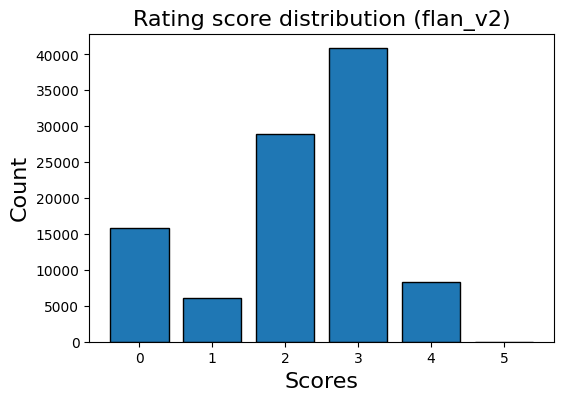

Dataset oasst1: Counter({7: 14829, 8: 6984, 6: 6440, 0: 4292, 5: 1021, 4: 274, 9: 35, 3: 31, 2: 11, 1: 2})
Dataset oasst1: Revised Counter({3: 14829, 4: 6984, 2: 6440, 0: 4610, 1: 1021, 5: 35}) 



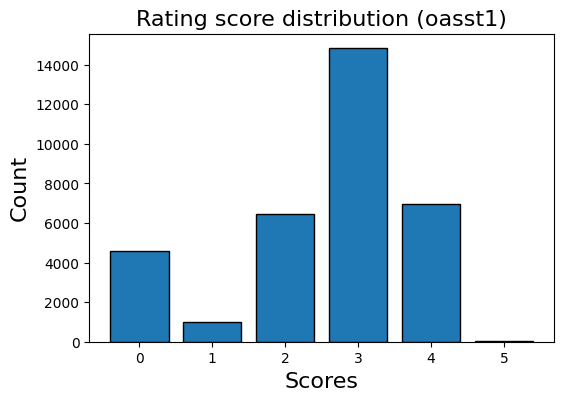

Dataset wizardlm: Counter({8: 41814, 7: 32925, 0: 15208, 6: 8241, 5: 1080, 9: 416, 4: 284, 3: 27, 2: 4, 14: 1})
Dataset wizardlm: Revised Counter({4: 41814, 3: 32925, 0: 15523, 2: 8241, 1: 1080, 5: 417}) 



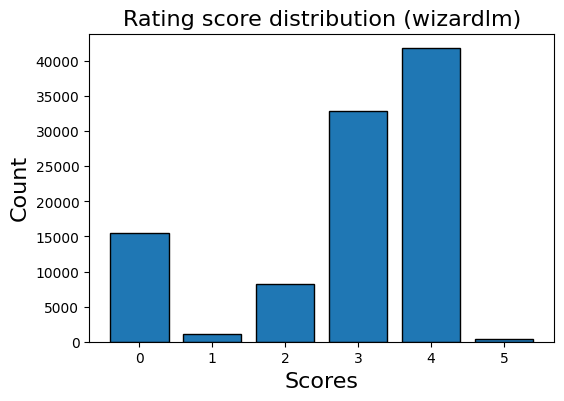

Dataset dolly: Counter({7: 6960, 6: 3639, 8: 2317, 0: 1741, 5: 295, 4: 43, 9: 11, 3: 5})
Dataset dolly: Revised Counter({3: 6960, 2: 3639, 4: 2317, 0: 1789, 1: 295, 5: 11}) 



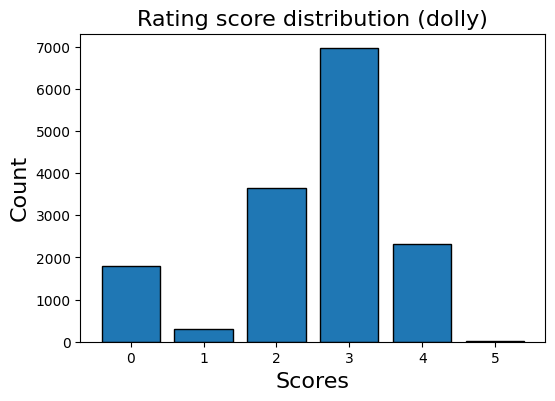

Dataset stanford_alpaca: Counter({7: 22758, 6: 13328, 8: 6795, 0: 6247, 5: 2263, 4: 565, 3: 37, 9: 5, 2: 3, 1: 1})
Dataset stanford_alpaca: Revised Counter({3: 22758, 2: 13328, 0: 6853, 4: 6795, 1: 2263, 5: 5}) 



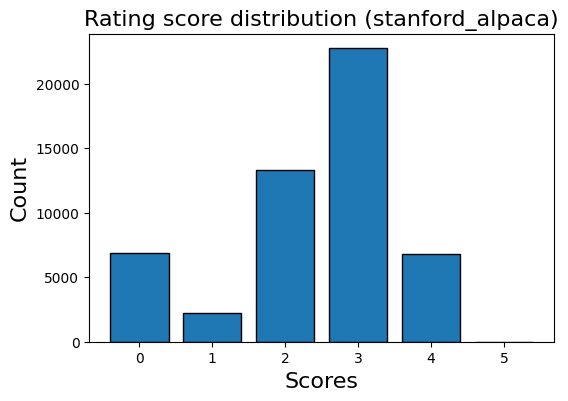

In [4]:
import torch
from collections import Counter
import  matplotlib.pyplot as plt
import os

dataset_list = ['flan_v2', 'oasst1', 'wizardlm', 'dolly', 'stanford_alpaca']

# dataset_list=['flan_v2']

# model_name="meta-llama/Meta-Llama-3.1-8B-Instruct"
# model_name='google/gemma-2-9b-it'
model_name= "mistralai/Mistral-7B-Instruct-v0.3"


for dataset_name in dataset_list:
    path = f"./new_train_data/{model_name}/{dataset_name}/"

    orginal_data_path = f"./labeling-info/output/{model_name}/{dataset_name}/"
    
    if not os.path.exists(path):
        os.makedirs(path)

    # original_labels = torch.load(orginal_data_path +'total_output_labels_best.pt')
    original_labels = torch.load(orginal_data_path +'output_labels.pt')
    original_labels = [label[-1] for label in original_labels]

    label_counts = Counter(original_labels)
    print(f"Dataset {dataset_name}: {label_counts}")


    labels_revised = []
    for label in original_labels:
        if label < 4:
            labels_revised.append(4)
        elif label > 10:
            labels_revised.append(9)
        else:
            labels_revised.append(label)

    labels_revised = [label - 4 for label in labels_revised] #rematching

    label_counts_revised = Counter(labels_revised)
    print(f"Dataset {dataset_name}: Revised {label_counts_revised} \n")

    torch.save(labels_revised, path + "output_labels_revised.pt")


    plt.figure(figsize=(6, 4))
    keys_revised = list(label_counts_revised.keys())
    values_revised = list(label_counts_revised.values())
    plt.bar(keys_revised, values_revised, edgecolor='black')
    # plt.title(f'Labeling model: {model_name}; Labels Distribution ({dataset_name})')
    plt.title(f'Rating score distribution ({dataset_name})', fontsize=16)

    plt.xlabel('Scores', fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.xticks(keys_revised)  
    plt.show()



## 1.1 check the high-rated samples and low-rated samples

In [44]:
import torch
from collections import Counter
from datasets import load_dataset
import os

# dataset_list = ['flan_v2', 'oasst1', 'wizardlm', 'dolly', 'stanford_alpaca']

dataset_list=['stanford_alpaca']

# model_name="meta-llama/Meta-Llama-3.1-8B-Instruct"
# model_name='google/gemma-2-9b-it'
model_name= "mistralai/Mistral-7B-Instruct-v0.3"


for dataset_name in dataset_list:
    path = f"./new_train_data/{model_name}/{dataset_name}/"

    train_data_path = f"./data/train_data/{dataset_name}_data.jsonl"
    
    train_data = load_dataset('json', data_files=train_data_path)

    labels_revised = torch.load(path + "output_labels_revised.pt")

    label_counts_revised = Counter(labels_revised)
    print(f"Dataset {dataset_name}: Revised {label_counts_revised} \n")


    label_indices = {label: [] for label in label_counts_revised}
    
    for idx, label in enumerate(labels_revised):
        label_indices[label].append(idx)

    print("Label indices:")
    for label, indices in label_indices.items():
        print(f"{label}: {indices}")

    high_rated_samples = train_data['train'].select(label_indices[5])
    low_rated_samples = train_data['train'].select(label_indices[1])

Dataset stanford_alpaca: Revised Counter({3: 22758, 2: 13328, 0: 6853, 4: 6795, 1: 2263, 5: 5}) 

Label indices:
3: [0, 2, 3, 9, 12, 13, 22, 27, 29, 36, 37, 39, 43, 46, 47, 49, 50, 51, 59, 63, 67, 68, 69, 72, 74, 78, 79, 80, 82, 83, 85, 88, 92, 93, 95, 99, 100, 102, 104, 106, 107, 109, 110, 115, 118, 120, 121, 122, 123, 124, 125, 129, 130, 137, 138, 140, 145, 146, 149, 152, 153, 156, 157, 159, 160, 162, 164, 165, 166, 168, 169, 170, 171, 172, 173, 175, 177, 178, 179, 180, 183, 184, 185, 187, 189, 190, 197, 202, 203, 204, 205, 206, 207, 210, 211, 217, 219, 223, 225, 230, 233, 234, 236, 240, 242, 243, 244, 249, 252, 254, 255, 257, 258, 262, 263, 264, 265, 277, 281, 282, 285, 287, 290, 291, 294, 300, 308, 309, 313, 314, 318, 320, 322, 324, 325, 328, 331, 332, 334, 335, 336, 337, 339, 340, 344, 347, 357, 359, 363, 364, 366, 367, 371, 373, 375, 378, 379, 386, 388, 389, 390, 392, 393, 394, 396, 397, 400, 401, 402, 404, 406, 411, 412, 413, 415, 416, 417, 418, 422, 427, 432, 436, 437, 440, 442

In [45]:
low_rated_samples[4]['messages']

[{'role': 'user',
  'content': 'Given a set of numbers, find the maximum value.\nInput: Set: {10, 3, 25, 6, 16}\nOutput:'},
 {'role': 'assistant', 'content': 'The maximum value is 25.'}]

In [47]:
high_rated_samples[1]['messages']

[{'role': 'user',
  'content': 'Create a list of best practices that should be followed in this field.\nHealthcare information technology\n\n'},
 {'role': 'assistant',
  'content': 'The following best practices should be followed in the healthcare information technology field: \n1. Adopt a risk-based approach to cybersecurity, utilizing measures such as multi-factor authentication, encryption, and vulnerability assessments. \n2. Develop clear guidelines and policies governing the use of technology.\n3. Develop protocols to ensure the secure sharing of patient data.\n4. Implement robust data processing and storage systems that adhere to industry regulations.\n5. Train healthcare staff in both the technical and non-technical aspects of IT use.\n6. Utilize professional IT staff for any maintenance or development tasks.\n7. Regularly test and monitor IT systems for potential vulnerabilities.'}]

## 2. Check the labeling report

In [ ]:
### run the code and check the report

# bash diagnose_tulu.sh


In [3]:
import torch
# Report saved to ./results/dolly/dolly_report.pt


dataset_name = 'dolly'
model_name= "mistralai/Mistral-7B-Instruct-v0.3"
# model_name="meta-llama/Meta-Llama-3.1-8B-Instruct"

reports = torch.load(f"score_curation/results/{model_name}/{dataset_name}/{dataset_name}_report.pt")

==== Docta: Doctor for your data. Current version: 0.2 ====


In [ ]:
reports.detection.keys()
reports.curation.keys()

In [ ]:
### report structure

{
    'names': {
        'diagnose': {
            'T': None, # square matrix
            'p_clean': None,  # row vector
            'p_org': None,  # row vector
            'class_distribution': None,  # histogram
            'group_distribution': None,  # histogram      
        },
        'detection': {
            'label_error': None, # (index, confidence)
            'coexistence': None, # (index, confidence)
            'rare_example': None, # (index, confidence)
        },
        'curation': {
            'label_curation':  None, # (index, suggested_label, confidence)
            'sampling_strategy': None, # (index, suggested_sample)
            'feature_curation': None, # (index, suggested_feature)      
        },
        'audition': {
            'model_perf': None, # (head_perf, tail_perf, overall_perf). 
            'fairness':  None, # (group_vec, performance_vec), disparity  
            'stress_test': None, # model_perf after distribution shift
        }
    }
}


### 2.1 Print Noise Transition Matrix

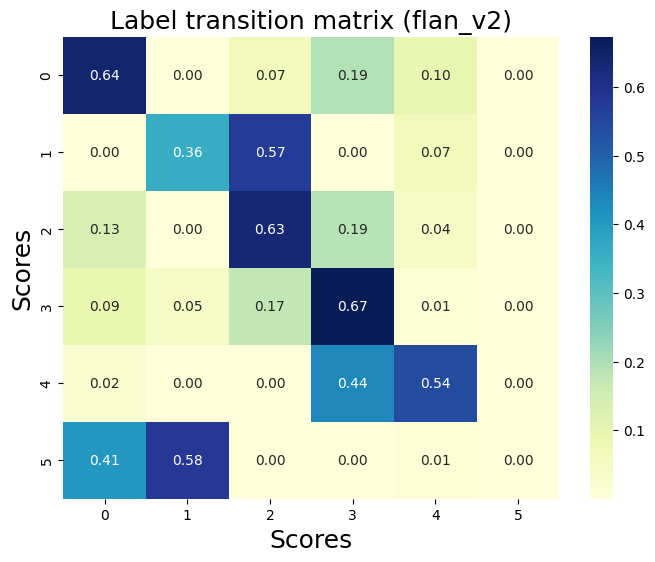

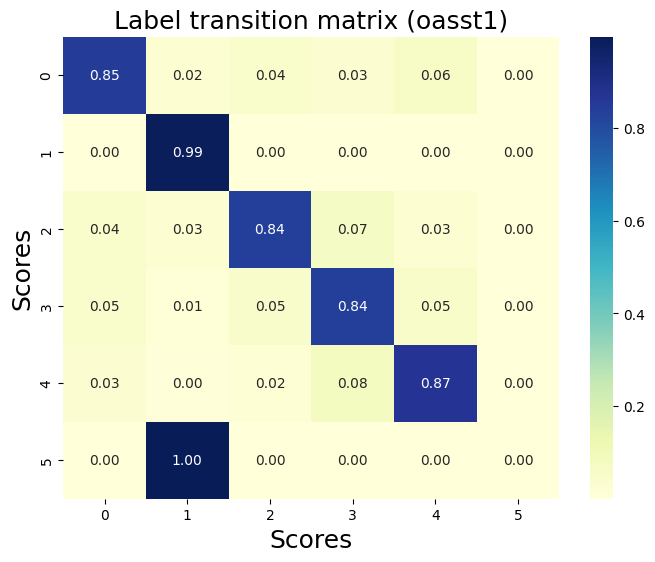

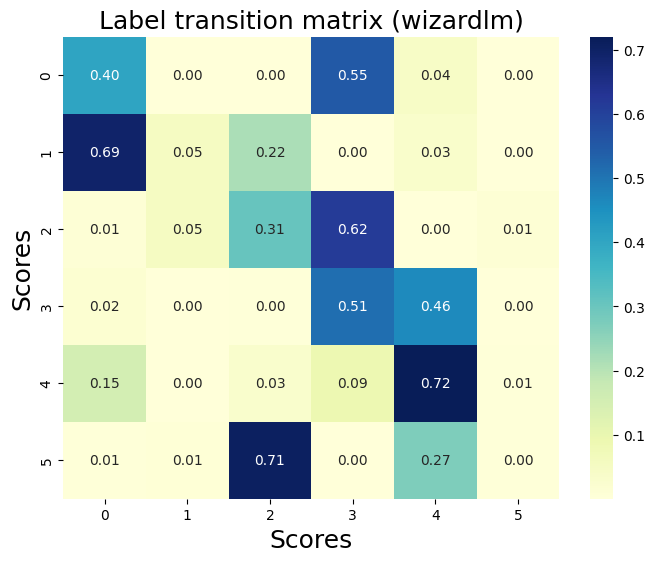

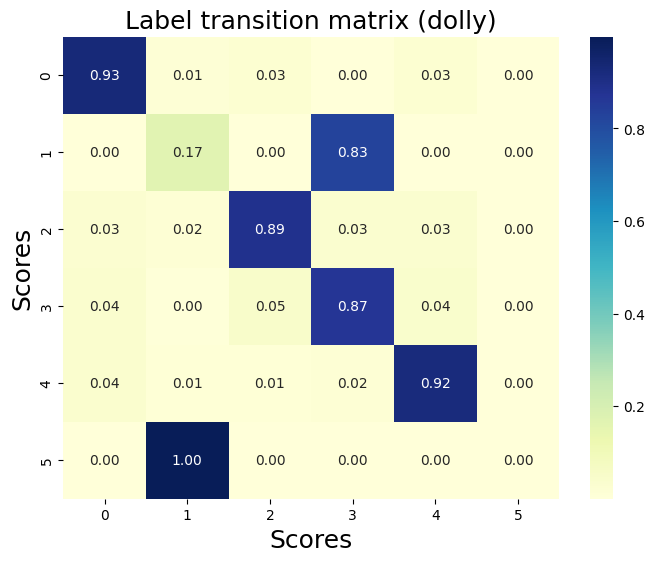

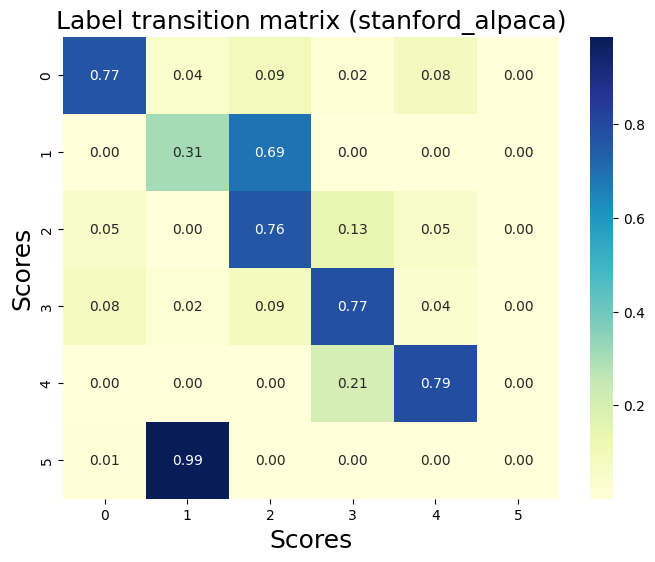

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

# List of datasets to process and model name
dataset_list = ['flan_v2', 'oasst1', 'wizardlm', 'dolly', 'stanford_alpaca']
model_name = "mistralai/Mistral-7B-Instruct-v0.3"

# Loop through each dataset in the list
for dataset_name in dataset_list:
    # Load report file for each dataset
    report_path = f"score_curation/results/{model_name}/{dataset_name}/{dataset_name}_report.pt"
    reports = torch.load(report_path)

    # Extract transition matrix data
    data = reports.diagnose['T']

    # Set figure size
    plt.figure(figsize=(8, 6))

    # Plot heatmap using seaborn
    sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu")

    # Add title and labels
    plt.title(f'Label transition matrix ({dataset_name})', fontsize=18)
    plt.xlabel('Scores', fontsize=18)
    plt.ylabel('Scores', fontsize=18)

    # Display the plot
    plt.show()


In [22]:
import torch 
import random
import numpy as np
from datasets import load_dataset

random.seed(42)
# dataset_list = ['flan_v2', 'oasst1', 'wizardlm', 'dolly', 'stanford_alpaca']

dataset_name ='oasst1'
# model_name="meta-llama/Meta-Llama-3.1-8B-Instruct"
model_name= "mistralai/Mistral-7B-Instruct-v0.3"

## label curation reports
report_path = f"score_curation/results/{model_name}/{dataset_name}/{dataset_name}_report.pt"

reports = torch.load(report_path)

'''Part 1 (label-wise): label curation'''
### choose the data index that needed to be remove
corrupted_samples = [x[0] for x in reports.detection['label_error']]

##  samples that can be cured
cured_samples = []
cured_sample_labels = []
for sample in reports.curation['label_curation']: ##(idx, label, confidence)
    if sample[2] >= 0.6: #confidence prob;0.7
        cured_samples.append(sample[0])
        cured_sample_labels.append((sample[0], sample[1]))



print(f"cured sample size: {len(cured_sample_labels)}")


#filter out some cured samples from corrupted instances
cured_samples_set = set(cured_samples)
corrupted_samples_total = [x for x in corrupted_samples if x not in cured_samples_set]

print(f"corrupted_samples_total: {len(corrupted_samples_total)}")


# change the original labels to the suggested label
root_path = f"./new_train_data/{model_name}/{dataset_name}/"

labels = torch.load(root_path + "output_labels_revised.pt")

for sample_label in cured_sample_labels:
    labels[sample_label[0]] = sample_label[1]
print(f"label size: {len(labels)}")

torch.save(labels, root_path + "clean_output_labels.pt")

cured sample size: 4449
corrupted_samples_total: 8866
label size: 52002


# 3.* New method for generating small-scale dataset

- Findings: From the current experiments, we found that simply filter out low-rated samples will hurt the representation because the low-rated samples may be still rare.


New selection strategy is here: **first compare the long-tail distribution between selecting high-rated sample before and after to verify that the long-tail distribution is hurting by directly fiter out the low-rated samples**

- Step 1: directly generate a long-tail distribution
- Step 2: for each interval, rather than random filter out samples, we select the high-rated samples util reaching the threshold
- Step 3: based on this, we can further do some label curation on this, which serves as one incremental technique.


In [49]:
import torch 
import random
import numpy as np
from datasets import load_dataset

random.seed(42)
# dataset_list = ['flan_v2', 'oasst1', 'wizardlm', 'dolly', 'stanford_alpaca']

dataset_name ='oasst1'

model_name="meta-llama/Meta-Llama-3.1-8B-Instruct"
# model_name= "mistralai/Mistral-7B-Instruct-v0.3"

## label curation reports
report_path = f"score_curation/results/{model_name}/{dataset_name}/{dataset_name}_report.pt"

reports = torch.load(report_path)

'''Part 1 (label-wise): label curation'''
### choose the data index that needed to be remove
corrupted_samples = [x[0] for x in reports.detection['label_error']]

##  samples that can be cured
cured_samples = []
cured_sample_labels = []
for sample in reports.curation['label_curation']: ##(idx, label, confidence)
    if sample[2] >= 0.7: #confidence prob;0.7
        cured_samples.append(sample[0])
        cured_sample_labels.append((sample[0], sample[1]))



print(f"cured sample size: {len(cured_sample_labels)}")


#filter out some cured samples from corrupted instances
cured_samples_set = set(cured_samples)
corrupted_samples_total = [x for x in corrupted_samples if x not in cured_samples_set]

print(f"corrupted_samples_total: {len(corrupted_samples_total)}")


# change the original labels to the suggested label
root_path = f"./new_train_data/{model_name}/{dataset_name}/"

labels = torch.load(root_path + "output_labels_revised.pt")

for sample_label in cured_sample_labels:
    labels[sample_label[0]] = sample_label[1]
print(f"label size: {len(labels)}")

## select high-quality samples based on the quality labels
labels = np.array(labels)
unique_labels, counts = np.unique(labels, return_counts=True)

for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")
###filter out the low-quality samples

low_quality_label_idx = []
# for idx, label in enumerate(labels):
#     ######################## select labels  ########################
#     if label<4: 
#         low_quality_label_idx.append(idx)
#     # elif label == 3 and random.random() >= 0.5:
#     #     low_quality_label_idx.append(idx)




label_wise_filter_out_samples = set(low_quality_label_idx + corrupted_samples_total)


print(f"label_wise_filter_out_samples: {len(label_wise_filter_out_samples)}")

'''Part-2 (feature-wise): handle the rare example'''

rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example'])//2]
# rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in label_wise_filter_out_samples] 
rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples] 

# rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in set(label_wise_filter_out_samples)] 


print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")

long_tail_scores = np.array(rare_samples_filtered)[:,1]

bins = np.arange(0, max(long_tail_scores)+0.01, 0.01) 

counts, _ = np.histogram(long_tail_scores, bins)


remaining_samples_indices = []


########################################################################################################################
# '''Only select the high-rated (5) samples '''
# for i in range(len(bins) - 1):
#     indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
#     # if counts[i] > threshold:
#     #     # indices_in_bin = [idx for idx in indices_in_bin if idx not in label_wise_filter_out_samples] ## only remove the wrong-annotated samples if the sample size is too much, otherwise remain them.

#     #     high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] == 5]

#     #     # if len(high_quality_indices_in_bin) >= threshold:

#     #     #     high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold)

#     #     remaining_samples_indices.extend(high_quality_indices_in_bin)
#     #     #     low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] >= 3]
#     #     #     print(f"threshold - len(high_quality_indices_in_bin: {threshold - len(high_quality_indices_in_bin)};;; len_low: {len(low_quality_indices_in_bin)}")
#     #     #     low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold - len(high_quality_indices_in_bin))
#     #     #     remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

#     # else:
#         # 
#     high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] == 5]

#     remaining_samples_indices.extend(high_quality_indices_in_bin)

########################################################################################################################
filter_idx=10
threshold = 20
for i in range(len(bins) - 1):
    
    if i <filter_idx:

        indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
        similar_sample_idxs = random.sample(list(indices_in_bin), min(int(10 * 100 * bins[i]), len(list(indices_in_bin))))

        remaining_samples_indices.extend(similar_sample_idxs)
    else:
        indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
        if counts[i] > threshold:
            # indices_in_bin = [idx for idx in indices_in_bin if idx not in label_wise_filter_out_samples] ## only remove the wrong-annotated samples if the sample size is too much, otherwise remain them.

            high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] >=4]

            if len(high_quality_indices_in_bin) >= threshold:

                high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold)
                remaining_samples_indices.extend(high_quality_indices_in_bin)

            else:
                low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] >= 2]
                print(f"threshold - len(high_quality_indices_in_bin: {threshold - len(high_quality_indices_in_bin)};;; len_low: {len(low_quality_indices_in_bin)}")
                if len(low_quality_indices_in_bin) > threshold - len(high_quality_indices_in_bin):
                    low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold - len(high_quality_indices_in_bin))
                remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

        else:
            remaining_samples_indices.extend(indices_in_bin)


########################################################################################################################


# for i in range(len(bins) - 1):
#     indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
#     if counts[i] > threshold:
#         indices_in_bin = [idx for idx in indices_in_bin if idx not in label_wise_filter_out_samples] ## only remove the wrong-annotated samples if the sample size is too much, otherwise remain them.
#         high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] >= 4]
#         low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] <= 3]
#         if len(high_quality_indices_in_bin) > threshold//2:
#             high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold//2) 
#         low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold //2)

#         remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

#     else:
#         remaining_samples_indices.extend(indices_in_bin)

########################################################################################################################
# for i in range(len(bins) - 1):
#     indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i+1]))[0]
#     if counts[i] > threshold:
#         new_indices_in_bin = random.sample(list(indices_in_bin), threshold)
#         remaining_samples_indices.extend(new_indices_in_bin)

#     else:
#         remaining_samples_indices.extend(indices_in_bin)
########################################################################################################################

# label_to_indices = {i: [] for i in range(1, 6)}

# for i in range(len(bins) - 1):
#     indices_in_bin = np.where((long_tail_scores >= bins[i]) & (long_tail_scores < bins[i + 1]))[0]
#     if counts[i] > threshold:
#         for idx in indices_in_bin:
#             label = labels[rare_samples_filtered[idx][0]]
#             if 1 <= label <= 5:
#                 label_to_indices[label].append(idx)
        
#         for label in range(3, 6):
#             indices = label_to_indices[label]
#             if len(indices) >= threshold // 3:
#                 sampled_indices = random.sample(indices, threshold // 3)
#             else:
#                 sampled_indices = indices  
#             remaining_samples_indices.extend(sampled_indices)
            
########################################################################################################################

remaining_samples_idx = np.array(rare_samples_filtered, dtype=int)[remaining_samples_indices, 0]
remaining_samples_idx_2 = remaining_samples_idx
# long_tail_scores_filtered = long_tail_scores[remaining_samples_idx]
long_tail_scores_filtered = np.array(rare_samples_filtered)[remaining_samples_indices, 1]

print("Size of the filtered dataset:", len(remaining_samples_idx))

'''filter out the corrupted samples and reconstruct the dataset'''

###the parquet data path
data_root_path = './data/train_data/'


data = load_dataset('json', data_files=data_root_path + f"{dataset_name}_data.jsonl")
filtered_dialogs = data['train'].select(remaining_samples_idx)

filtered_labels = np.array(labels)[remaining_samples_idx].tolist()
torch.save(filtered_labels, root_path + "filtered_output_labels.pt")

assert len(filtered_dialogs) == len(filtered_labels)

# output_path = root_path + "data/flan_v2/filtered_flan_v2.parquet"
# filtered_dialogs.to_parquet(output_path)

output_json_path = root_path + f"filtered_dataset.json"  ## the json form is for funetunning
filtered_dialogs.to_json(output_json_path)

print(f"output_json_path: {output_json_path}")

###############################################
# random baseline
print("\n Start creating the random-select dataset!")
full_data_size = len(labels)
data_size = len(filtered_labels)

# data_size = 3000

print(f"full data size: {full_data_size}; random selected size: {data_size}!!!")

### random data
random_samples_idx = random.sample(list(range(full_data_size)), data_size)
random_dialogs = data['train'].select(random_samples_idx)
output_json_path = root_path + f"random_dataset.json"  ## the json form is for funetunning
random_dialogs.to_json(output_json_path)


# full data
data['train'].to_json( root_path + f"full_dataset.json")


cured sample size: 2658
corrupted_samples_total: 3677
label size: 33919
Label: 0, Count: 3703
Label: 1, Count: 4045
Label: 2, Count: 3940
Label: 3, Count: 15748
Label: 4, Count: 6326
Label: 5, Count: 157
label_wise_filter_out_samples: 3677
Size of the remaining samples with high quality: 33919
threshold - len(high_quality_indices_in_bin: 12;;; len_low: 26
Size of the filtered dataset: 616


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 61.42ba/s]


output_json_path: ./new_train_data/meta-llama/Meta-Llama-3.1-8B-Instruct/oasst1/filtered_dataset.json

 Start creating the random-select dataset!
full data size: 33919; random selected size: 616!!!


Creating json from Arrow format: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 69.81ba/s]


66137017

Size of the original samples with high quality: 15011
Size of the remaining samples with high quality: 14442
Size of the remaining samples with high quality: 14442


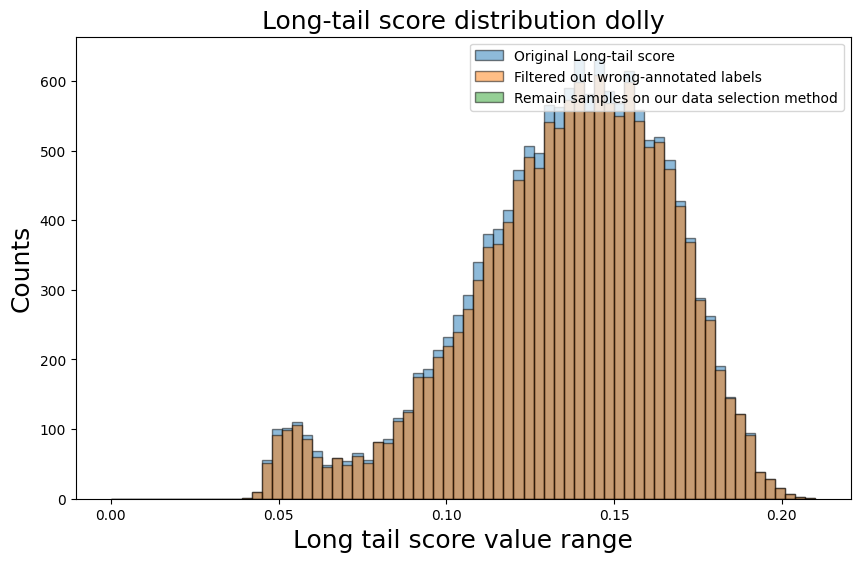

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
random.seed(42)

# dataset_name ='flan_v2'
# model_name="meta-llama/Meta-Llama-3.1-8B-Instruct"

## label curation reports
report_path = f"score_curation/results/{model_name}/{dataset_name}/{dataset_name}_report.pt"

reports = torch.load(report_path)
rare_samples = reports.detection['rare_example'][:len(reports.detection['rare_example'])//2]
rare_samples_orginal = [[sample[0], sample[1]] for sample in rare_samples] 

rare_samples_filtered = [[sample[0], sample[1]] for sample in rare_samples if sample[0] not in set(label_wise_filter_out_samples)] 

print(f"Size of the original samples with high quality: {len(rare_samples_orginal)}")
print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")


print(f"Size of the remaining samples with high quality: {len(rare_samples_filtered)}")


long_tail_scores_filtered = np.array(rare_samples_filtered)[:,1]

long_tail_scores_orginal = np.array(rare_samples_orginal)[:,1]



bins = np.arange(0, max(max(long_tail_scores_filtered), max(long_tail_scores_orginal)) + 0.003, 0.003)


counts, _ = np.histogram(long_tail_scores_filtered, bins)
threshold = 530   ## the random threshold for feature-wise
remaining_samples_indices = []
for i in range(len(bins) - 1):
    indices_in_bin = np.where((long_tail_scores_filtered >= bins[i]) & (long_tail_scores_filtered < bins[i+1]))[0]
    # if counts[i] > threshold:
    #     high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] > 4]

    #     if len(high_quality_indices_in_bin) >= threshold:

    #         high_quality_indices_in_bin = random.sample(list(high_quality_indices_in_bin), threshold)
    #     remaining_samples_indices.extend(high_quality_indices_in_bin)

    #     # else:
    #     #     print(f"threshold - len(high_quality_indices_in_bin: {threshold - len(high_quality_indices_in_bin)}")
    #     #     low_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] <= 3]
    #     #     low_quality_indices_in_bin = random.sample(list(low_quality_indices_in_bin), threshold - len(high_quality_indices_in_bin))
    #     #     remaining_samples_indices.extend(high_quality_indices_in_bin + low_quality_indices_in_bin)

    # else:
    #     remaining_samples_indices.extend(indices_in_bin)

    high_quality_indices_in_bin = [idx for idx in indices_in_bin if labels[rare_samples_filtered[idx][0]] > 4]
    remaining_samples_indices.extend(high_quality_indices_in_bin)


remaining_samples_idx = np.array(rare_samples_filtered, dtype=int)[remaining_samples_indices, 0]

long_tail_scores_filtered_new = np.array(rare_samples_filtered)[remaining_samples_indices, 1]





plt.figure(figsize=(10, 6))
plt.hist(long_tail_scores_orginal, bins, alpha=0.5, label='Original Long-tail score', edgecolor='black')
plt.hist(long_tail_scores_filtered, bins, alpha=0.5, label='Filtered out wrong-annotated labels', edgecolor='black')

plt.hist(long_tail_scores_filtered_new, bins, alpha=0.5, label='Remain samples on our data selection method', edgecolor='black')


plt.title(f'Long-tail score distribution {dataset_name}', fontsize=18)
plt.xlabel('Long tail score value range', fontsize=18)
plt.ylabel('Counts', fontsize=18)

plt.legend(loc='upper right')

threshold_value = 400  
# plt.axhline(y=threshold_value, color='orange', linestyle='--')
# plt.text(x=0.1, y=threshold_value + 100, s='cutting threshold', color='orange', fontsize=14, ha='right', va='bottom')

plt.show()




## Plot the long-tail score distribution per label

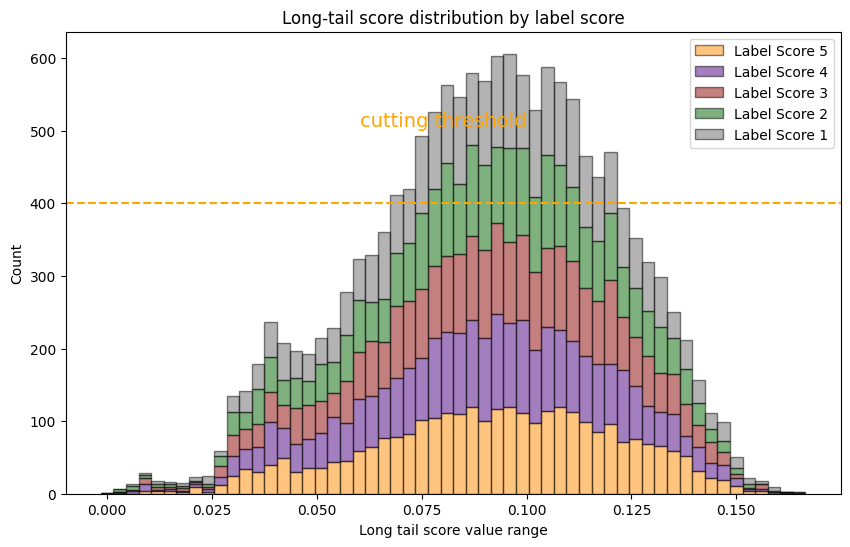

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Assuming 'labels' is a dictionary with each rare_sample's index mapped to a label score
# Example: labels = {index: score, ...}
# Here, we generate sample labels randomly between 1 and 5 as placeholders
labels = {sample[0]: np.random.randint(1, 6) for sample in rare_samples}  # Replace with actual data as needed

# Extract long-tail scores from rare_samples
long_tail_scores = np.array(rare_samples)[:, 1]

# Define bins for histogram with a specified interval
bins = np.arange(0, max(long_tail_scores) + 0.003, 0.003)

# Group scores by label (assumes labels are between 1 and 5)
grouped_counts = {i: np.zeros(len(bins) - 1) for i in range(1, 6)}
for i, score in enumerate(long_tail_scores):
    label = labels[rare_samples[i][0]]
    bin_index = np.digitize(score, bins) - 1  # Find bin for the score
    grouped_counts[label][bin_index] += 1  # Increment count for label in the respective bin

# Plot stacked histogram
plt.figure(figsize=(10, 6))

# Define colors and alpha for transparency
colors = ['darkorange', 'indigo', 'darkred', 'darkgreen', 'dimgray']
alpha = 0.5  # Set transparency to 50%

# Plot each label's distribution as a stacked bar
bottom = np.zeros(len(bins) - 1)
for i in range(5, 0, -1):  # Iterate from label 5 to 1 for stacking order
    plt.bar(bins[:-1], grouped_counts[i], width=np.diff(bins), bottom=bottom,
            color=colors[5 - i], edgecolor='black', alpha=alpha, label=f'Label Score {i}')
    bottom += grouped_counts[i]

# Add title and axis labels
plt.title('Long-tail score distribution by label score')
plt.xlabel('Long tail score value range')
plt.ylabel('Count')

# Add legend
plt.legend(loc='upper right')

# Add threshold line with label
threshold_value = 400  # Example threshold; adjust based on your data
plt.axhline(y=threshold_value, color='orange', linestyle='--')
plt.text(x=0.1, y=threshold_value + 100, s='cutting threshold', color='orange', fontsize=14, ha='right', va='bottom')

# Display plot
plt.show()
